# Input a audio file with .wav

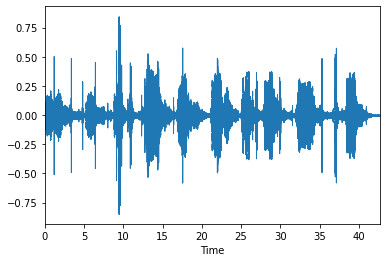

In [1]:
import librosa
import librosa.display

filename = 'C:\\Users\\Bhanu prakash\\Downloads\\whale_sound.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

# Appling fast  fourier transform in one short window

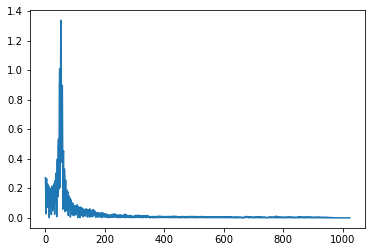

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

Fourier Transform is a function that gets a signal in the time domain as input, and outputs its decomposition into frequencies.It is a mathematical representation of sound

# Apllying FT on whole audio file

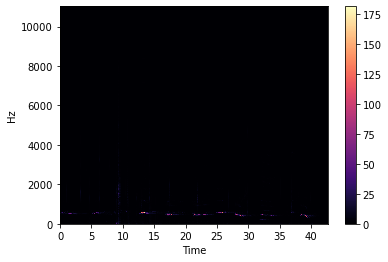

In [3]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

# Converting y-axis freq to log scale and color axis Amplitude to decibals for better visualisation

E:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
E:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
E:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


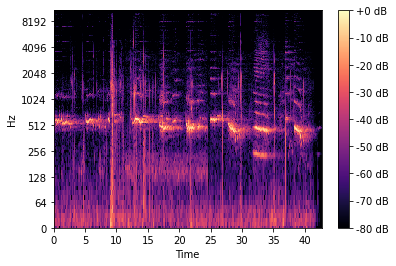

In [4]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

# we apply mel scale to y-axis which is a non-linear transformation of frequency to make sounds equi-distant for human hearing

In [5]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

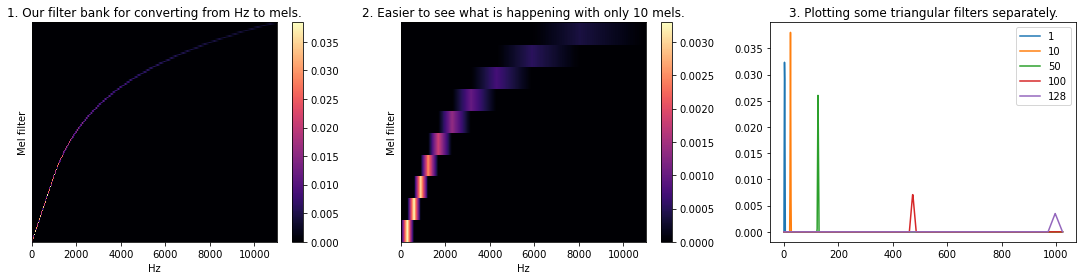

In [6]:
plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout();

 Hz scale is converted to bins, each bin is transformed to corresponding bin in Mel scale.

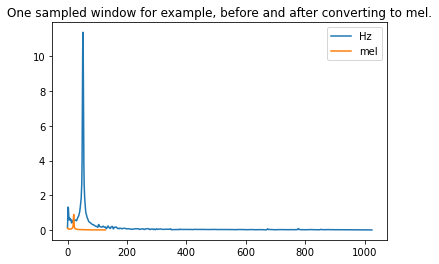

In [7]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

perform dot product on window of one amplitude with mel scale to get new frequecy scale

# Computing mel spectrogram for an audio file

E:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
E:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


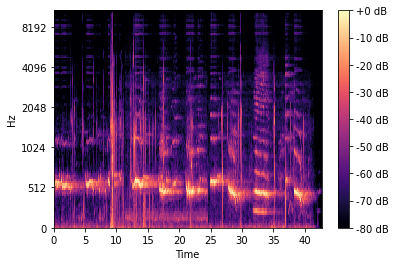

In [9]:
filename = 'C:\\Users\\Bhanu prakash\\Downloads\\whale_sound.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

hop_length=the number of samples in between successive frames

# Summary

The Mel Spectrogram is the result of the following pipeline:

    Separate to windows: Sample the input with windows of size n_fft=2048, making hops of size hop_length=512 each time to sample the next window.
    Compute FFT (Fast Fourier Transform) for each window to transform from time domain to frequency domain.
    Generate a Mel scale: Take the entire frequency spectrum, and separate it into n_mels=128 evenly spaced frequencies.
    And what do we mean by evenly spaced? not by distance on the frequency dimension, but distance as it is heard by the human ear.
    Generate Spectrogram: For each window, decompose the magnitude of the signal into its components, corresponding to the frequencies in the mel scale.

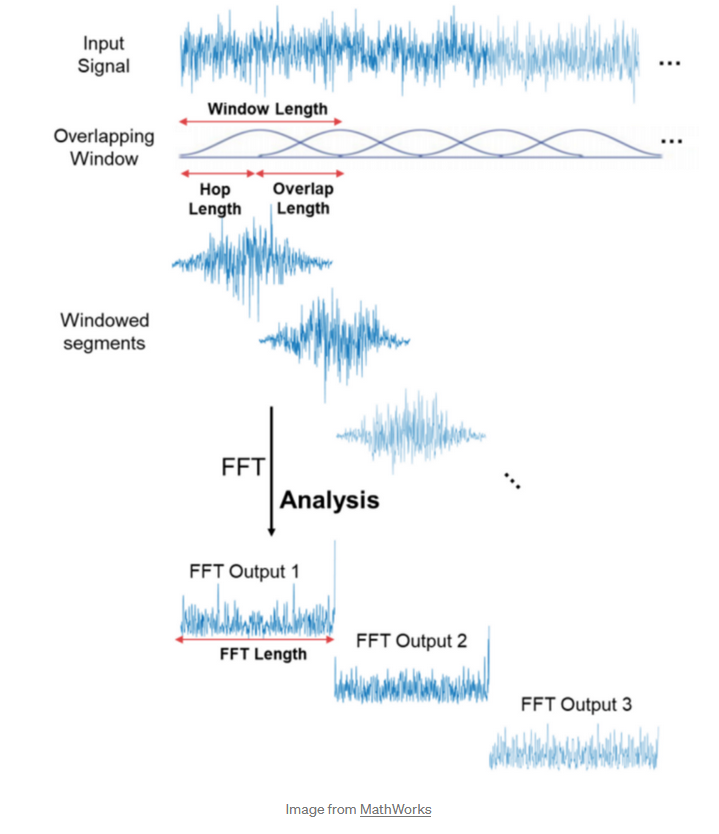

In [12]:
from IPython.display import display
from PIL import Image


path="C:\\Users\\Bhanu prakash\\Pictures\\Mel.PNG"
display(Image.open(path))